# Reproduciple Data Analysis 


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')


In [2]:
from bikestats.data import get_fremont_data

5


In [3]:
data = get_fremont_data()
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


<Axes: xlabel='Date'>

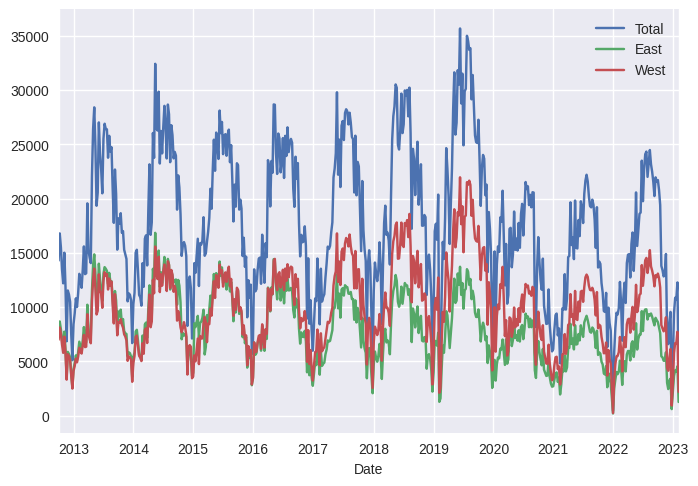

In [4]:
data.resample('W').sum().plot()

(0.0, 1256022.05)

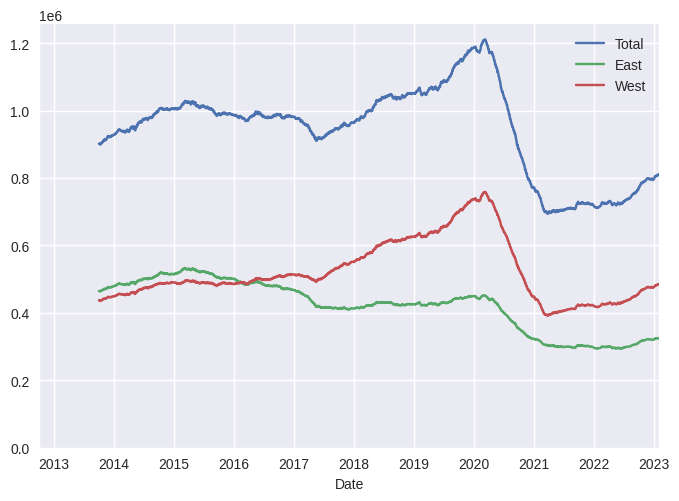

In [5]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

<Axes: xlabel='time'>

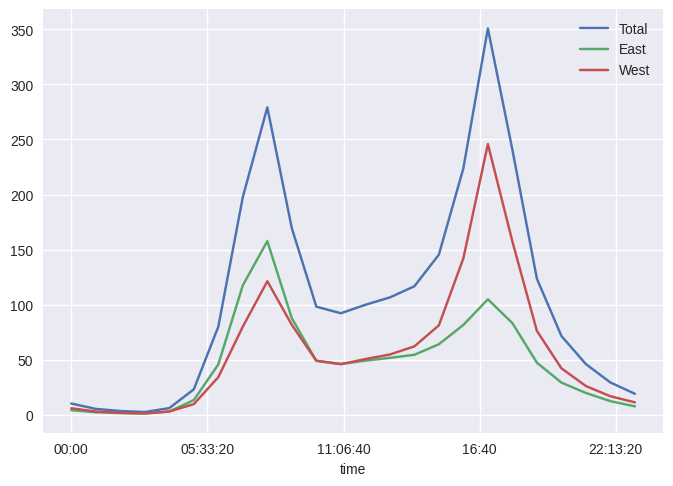

In [6]:
data.groupby(data.index.time).mean().plot()

In [7]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<Axes: xlabel='time'>

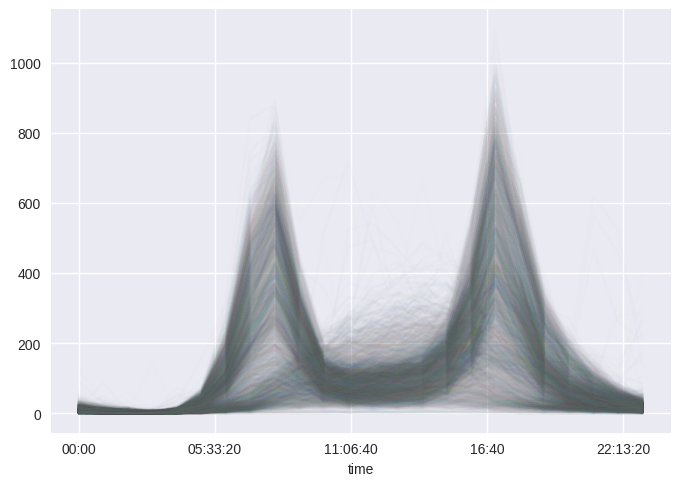

In [8]:
pivoted.plot(legend=False, alpha=0.01)

In [10]:
get_fremont_data?


Signature:
get_fremont_data(
    filename='Fremont.csv',
    url='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD',
    force_download=False,
)
Docstring:
Download and cache Fremont bridge bike data 

Args:
        filename (str, optional): _description_. Defaults to 'Fremont.csv'.
        url (str, optional): _description_. Defaults to FREMONT_URL.
        force_download (bool, optional): _description_. Defaults to False. If True, force redownload of data

Returns:
        data : pandas.DataFrame
                The fremont bridge data
File:      ~/repos/jupyter-bike-stats-demo/bikestats/data.py
Type:      function